### *Assessment of pathways using the IAMC 1.5°C Scenario Data*

<img style="float: right; height: 60px; padding-left: 20px;" src="../_static/IIASA_logo.png">
<img style="float: right; height: 60px;" src="../_static/iamc-logo.png">

# CO2 emissions in the Sustainable Development Scenario (IEA-ETP 2020)

This notebook illustrates the CO2 emissions in the **Sustainable Development Scenario** from the 2020 IEA Energy Technology Perspectives report ([press release](https://www.iea.org/news/reaching-energy-and-climate-goals-demands-a-dramatic-scaling-up-of-clean-energy-technologies-starting-now)) compared to the IAMC 1.5°C Scenario Ensemble compiled for the IPCC's _"Special Report on Global Warming of 1.5°C"_.

The scenario data used in this analysis can be accessed and downloaded at [https://data.ene.iiasa.ac.at/iamc-1.5c-explorer](https://data.ene.iiasa.ac.at/iamc-1.5c-explorer).

## Load ``pyam`` package and other dependences

In [1]:
import pandas as pd
import numpy as np
import io
import itertools
import yaml
import math
import matplotlib.pyplot as plt
plt.style.use('../assessment/style_sr15.mplstyle')
%matplotlib inline
import pyam

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


## Import scenario data, categorization and specifications files

The metadata file must be generated from the notebook `sr15_2.0_categories_indicators`
in the repository https://github.com/iiasa/ipcc_sr15_scenario_analysis.
If the snapshot file has been updated, make sure that you rerun the categorization notebook.

The last cell of this section loads and assigns a number of auxiliary lists as defined in the categorization notebook.

In [2]:
sr1p5 = pyam.IamDataFrame(data='../data/iamc15_scenario_data_world_r2.0.xlsx')

pyam.core - INFO: Reading file `../data/iamc15_scenario_data_world_r2.0.xlsx`


In [3]:
sr1p5.load_meta('../assessment/sr15_metadata_indicators.xlsx')

pyam.core - INFO: Importing meta indicators for 416 scenarios (for total of 416)


In [4]:
with open("../assessment/sr15_specs.yaml", 'r') as stream:
    specs = yaml.load(stream, Loader=yaml.FullLoader)

rc = pyam.run_control()
for item in specs.pop('run_control').items():
    rc.update({item[0]: item[1]})
cats = specs.pop('cats')
cats_15 = specs.pop('cats_15')
cats_15_no_lo = specs.pop('cats_15_no_lo')

## Downselect scenario ensemble

In [5]:
years = range(2010, 2101, 10)

In [6]:
df = (
    sr1p5
    .filter(category='Above 2C', keep=False)
    .filter(variable='Emissions|CO2', year=years)
)

In [7]:
df.convert_unit('Mt CO2/yr', 'Gt CO2/yr', inplace=True)

## Append IEA ETP 2020 SDS scenario data

Data collected from this chart: https://www.iea.org/data-and-statistics/charts/global-energy-sector-co2-emissions-by-sector-in-the-sustainable-development-scenario-2019-2070

In [8]:
_sds = pd.DataFrame([33.4, 27.4, 16.7, 9.4, 3.8, 0], columns=['year'], index=range(2020, 2071, 10)).T
df.append(_sds, model='IEA ETP 2020', scenario='SDS',
          variable='Emissions|CO2', unit='Gt CO2/yr', region='year', inplace=True)

## Plot the IEA ETP 2020 CO2 emissions

Text(0.5, 1.0, 'CO2 emissions in IEA ETP (2020/2017) scenarios relative to IAMC 1.5°C scenarios')

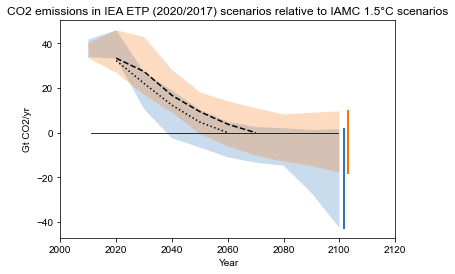

In [9]:
fig, ax = plt.subplots()

_cats = df.filter(category=['1.5C low overshoot', 'Lower 2C'])
_cats.line_plot(ax=ax, color='category', linewidth=0, fill_between=True, final_ranges=True, legend=False)
ax.axhline(y=0, xmin=0.09, xmax=0.83, color='black', linewidth=0.8)

etp_2020 = df.filter(model='IEA ETP 2020')
etp_2020.line_plot(ax=ax, color='black', linewidth=1.5, linestyle='--', legend=False)

etp_2017 = df.filter(model='IEA Energy Technology Perspective Model 2017')
etp_2017.line_plot(ax=ax, color='black', linewidth=1.5, linestyle=':', legend=False)

ax.set_title('CO2 emissions in IEA ETP (2020/2017) scenarios relative to IAMC 1.5°C scenarios')